In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns


In [10]:
df = pd.read_csv("/Users/andreatamburri/Documents/Github/default-predictor/dataset.csv", delimiter = ";")
print(df.head())

                                   uuid  default  account_amount_added_12_24m  \
0  63f69b2c-8b1c-4740-b78d-52ed9a4515ac      0.0                            0   
1  0e961183-8c15-4470-9a5e-07a1bd207661      0.0                            0   
2  d8edaae6-4368-44e0-941e-8328f203e64e      0.0                            0   
3  0095dfb6-a886-4e2a-b056-15ef45fdb0ef      0.0                            0   
4  c8f8b835-5647-4506-bf15-49105d8af30b      0.0                            0   

   account_days_in_dc_12_24m  account_days_in_rem_12_24m  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   account_days_in_term_12_24m  account_incoming_debt_vs_paid_0_24m  \
0                          0.0                                  0.0   
1         

In [4]:
print("Mean Default: ", df['default'].mean())
#skewed distribution towards left --> not default

Mean Default:  0.014314928425357873


In [5]:
#10% of records doesn't contain default --> this is for API
print(df.describe())

            default  account_amount_added_12_24m  account_days_in_dc_12_24m  \
count  89976.000000                 9.997600e+04               88140.000000   
mean       0.014315                 1.225515e+04                   0.223043   
std        0.118786                 3.548148e+04                   5.808117   
min        0.000000                 0.000000e+00                   0.000000   
25%        0.000000                 0.000000e+00                   0.000000   
50%        0.000000                 0.000000e+00                   0.000000   
75%        0.000000                 4.937250e+03                   0.000000   
max        1.000000                 1.128775e+06                 365.000000   

       account_days_in_rem_12_24m  account_days_in_term_12_24m  \
count                88140.000000                 88140.000000   
mean                     5.044622                     0.286896   
std                     22.863971                     2.929910   
min                     

In [10]:
df.dtypes
#to process merchant_category merchant_group and has_paid

uuid                                    object
default                                float64
account_amount_added_12_24m              int64
account_days_in_dc_12_24m              float64
account_days_in_rem_12_24m             float64
account_days_in_term_12_24m            float64
account_incoming_debt_vs_paid_0_24m    float64
account_status                         float64
account_worst_status_0_3m              float64
account_worst_status_12_24m            float64
account_worst_status_3_6m              float64
account_worst_status_6_12m             float64
age                                      int64
avg_payment_span_0_12m                 float64
avg_payment_span_0_3m                  float64
merchant_category                       object
merchant_group                          object
has_paid                                  bool
max_paid_inv_0_12m                     float64
max_paid_inv_0_24m                     float64
name_in_email                           object
num_active_di

In [6]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())

'''
account_days_in_dc_12_24m              11836 mean
account_days_in_rem_12_24m             11836 mean
account_days_in_term_12_24m            11836 mean
account_incoming_debt_vs_paid_0_24m    59315 no
account_status                         54373  put nan as 0
account_worst_status_0_3m              54373  put nan as 0
account_worst_status_12_24m            66761  put nan as 0
account_worst_status_3_6m              57702  put nan as 0
account_worst_status_6_12m             60350  put nan as 0
avg_payment_span_0_12m                 23836  mean
avg_payment_span_0_3m                  49305  mean
num_active_div_by_paid_inv_0_12m       22939  mean
num_arch_written_off_0_12m             18078  put nan as 0
num_arch_written_off_12_24m            18078  put nan as 0
worst_status_active_inv                69515   put nan as 0
'''

 
Count total NaN at each column in a DataFrame : 

 uuid                                       0
default                                10000
account_amount_added_12_24m                0
account_days_in_dc_12_24m              11836
account_days_in_rem_12_24m             11836
account_days_in_term_12_24m            11836
account_incoming_debt_vs_paid_0_24m    59315
account_status                         54373
account_worst_status_0_3m              54373
account_worst_status_12_24m            66761
account_worst_status_3_6m              57702
account_worst_status_6_12m             60350
age                                        0
avg_payment_span_0_12m                 23836
avg_payment_span_0_3m                  49305
merchant_category                          0
merchant_group                             0
has_paid                                   0
max_paid_inv_0_12m                         0
max_paid_inv_0_24m                         0
name_in_email                              0
nu

'\naccount_days_in_dc_12_24m              11836 mean\naccount_days_in_rem_12_24m             11836 mean\naccount_days_in_term_12_24m            11836 mean\naccount_incoming_debt_vs_paid_0_24m    59315 no\naccount_status                         54373  put nan as 0\naccount_worst_status_0_3m              54373  put nan as 0\naccount_worst_status_12_24m            66761  put nan as 0\naccount_worst_status_3_6m              57702  put nan as 0\naccount_worst_status_6_12m             60350  put nan as 0\navg_payment_span_0_12m                 23836  mean\navg_payment_span_0_3m                  49305  mean\nnum_active_div_by_paid_inv_0_12m       22939  mean\nnum_arch_written_off_0_12m             18078  put nan as 0\nnum_arch_written_off_12_24m            18078  put nan as 0\nworst_status_active_inv                69515   put nan as 0\n'

In [11]:
target_0 = df[df["default"]==0]
target_1 = df[df["default"]==1]

       account_days_in_dc_12_24m
count               78096.000000
mean                    0.171648
std                     5.000260
min                     0.000000
25%                     0.000000
50%                     0.000000
75%                     0.000000
max                   362.000000
       account_days_in_dc_12_24m
count                1197.000000
mean                    3.197995
std                    21.442738
min                     0.000000
25%                     0.000000
50%                     0.000000
75%                     0.000000
max                   322.000000


/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.

<AxesSubplot:ylabel='Density'>

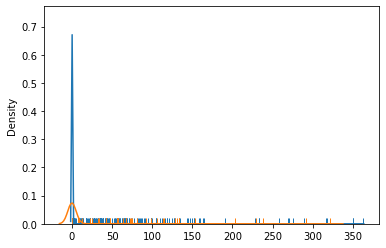

In [12]:

#mean highly superior in default, interesting, I'll deal with mean

print(target_0[['account_days_in_dc_12_24m']].describe())
print(target_1[['account_days_in_dc_12_24m']].describe())
sns.distplot(target_0[['account_days_in_dc_12_24m']], hist=False, rug=True)
sns.distplot(target_1[['account_days_in_dc_12_24m']], hist=False, rug=True)

       account_status
count    40206.000000
mean         1.038154
std          0.192217
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
       account_status
count      836.000000
mean         1.210526
std          0.439035
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000


/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.

<AxesSubplot:ylabel='Density'>

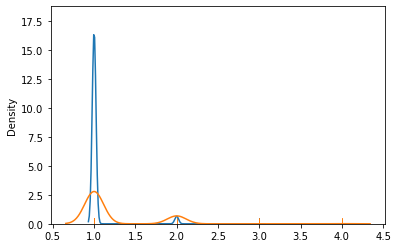

In [13]:
#it could be informative, since max for default it's 4, I can manage with a 0 the nan
print(target_0[['account_status']].describe())
print(target_1[['account_status']].describe())
sns.distplot(target_0[['account_status']], hist=False, rug=True)
sns.distplot(target_1[['account_status']], hist=False, rug=True)

       account_worst_status_0_3m
count               40206.000000
mean                    1.163632
std                     0.406221
min                     1.000000
25%                     1.000000
50%                     1.000000
75%                     1.000000
max                     4.000000
       account_worst_status_0_3m
count                 836.000000
mean                    1.637560
std                     0.730172
min                     1.000000
25%                     1.000000
50%                     2.000000
75%                     2.000000
max                     4.000000


/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.

<AxesSubplot:ylabel='Density'>

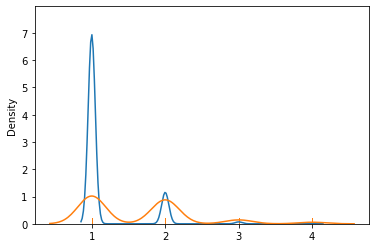

In [14]:
#it could be informative, since mean its slightly superior, I can manage with a 0 the nan
print(target_0[['account_worst_status_0_3m']].describe())
print(target_1[['account_worst_status_0_3m']].describe())
sns.distplot(target_0[['account_worst_status_0_3m']], hist=False, rug=True)
sns.distplot(target_1[['account_worst_status_0_3m']], hist=False, rug=True)

       account_worst_status_12_24m
count                 29381.000000
mean                      1.326878
std                       0.560884
min                       1.000000
25%                       1.000000
50%                       1.000000
75%                       2.000000
max                       4.000000
       account_worst_status_12_24m
count                   540.000000
mean                      2.011111
std                       0.886859
min                       1.000000
25%                       1.000000
50%                       2.000000
75%                       2.000000
max                       4.000000


/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.

<AxesSubplot:ylabel='Density'>

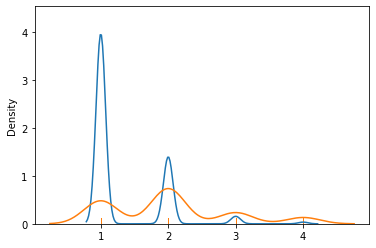

In [15]:
#it could be informative, since mean its slightly superior, I can manage with a 0 the nan
print(target_0[['account_worst_status_12_24m']].describe())
print(target_1[['account_worst_status_12_24m']].describe())
sns.distplot(target_0[['account_worst_status_12_24m']], hist=False, rug=True)
sns.distplot(target_1[['account_worst_status_12_24m']], hist=False, rug=True)

       account_worst_status_3_6m
count               37320.000000
mean                    1.175831
std                     0.426242
min                     1.000000
25%                     1.000000
50%                     1.000000
75%                     1.000000
max                     4.000000
       account_worst_status_3_6m
count                 718.000000
mean                    1.685237
std                     0.832452
min                     1.000000
25%                     1.000000
50%                     2.000000
75%                     2.000000
max                     4.000000


/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.

<AxesSubplot:ylabel='Density'>

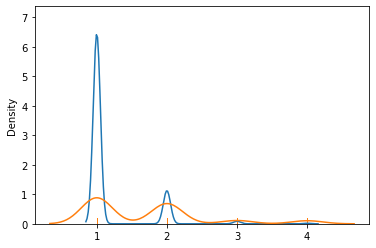

In [16]:
#it could be informative, since mean its slightly superior, I can manage with a 0 the nan
print(target_0[['account_worst_status_3_6m']].describe())
print(target_1[['account_worst_status_3_6m']].describe())
sns.distplot(target_0[['account_worst_status_3_6m']], hist=False, rug=True)
sns.distplot(target_1[['account_worst_status_3_6m']], hist=False, rug=True)

       account_worst_status_6_12m
count                35007.000000
mean                     1.242323
std                      0.488319
min                      1.000000
25%                      1.000000
50%                      1.000000
75%                      1.000000
max                      4.000000
       account_worst_status_6_12m
count                  656.000000
mean                     1.879573
std                      0.915920
min                      1.000000
25%                      1.000000
50%                      2.000000
75%                      2.000000
max                      4.000000


/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.

<AxesSubplot:ylabel='Density'>

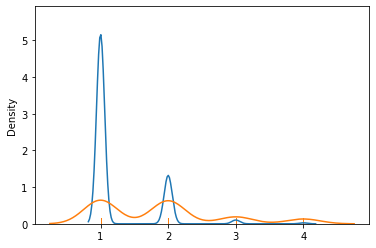

In [17]:
#it could be informative, since mean its slightly superior, I can manage with a 0 the nan
print(target_0[['account_worst_status_6_12m']].describe())
print(target_1[['account_worst_status_6_12m']].describe())
sns.distplot(target_0[['account_worst_status_6_12m']], hist=False, rug=True)
sns.distplot(target_1[['account_worst_status_6_12m']], hist=False, rug=True)

       avg_payment_span_0_12m
count            67838.000000
mean                17.726766
std                 12.167796
min                  0.000000
25%                 10.755556
50%                 14.833333
75%                 21.000000
max                224.000000
       avg_payment_span_0_12m
count              670.000000
mean                43.408737
std                 33.490758
min                  0.000000
25%                 18.541667
50%                 37.000000
75%                 57.000000
max                260.000000


/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.

<AxesSubplot:ylabel='Density'>

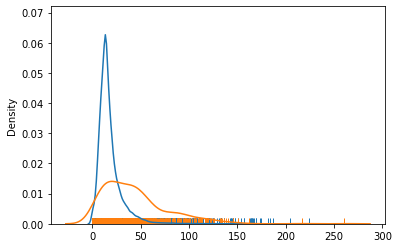

In [18]:
#it' really interesting, I can manage with a mean the nan
print(target_0[['avg_payment_span_0_12m']].describe())
print(target_1[['avg_payment_span_0_12m']].describe())
sns.distplot(target_0[['avg_payment_span_0_12m']], hist=False, rug=True)
sns.distplot(target_1[['avg_payment_span_0_12m']], hist=False, rug=True)


       avg_payment_span_0_3m
count           45335.000000
mean               14.903550
std                10.171053
min                 0.000000
25%                 8.333333
50%                13.000000
75%                18.000000
max                84.000000
       avg_payment_span_0_3m
count             259.000000
mean               24.914134
std                17.987244
min                 0.000000
25%                11.416667
50%                20.500000
75%                37.000000
max                86.000000


/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.

<AxesSubplot:ylabel='Density'>

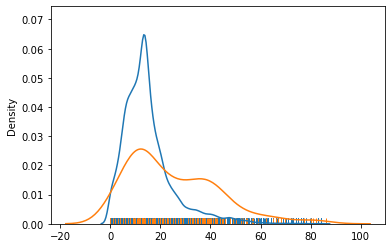

In [19]:
#it' really interesting, I can manage with a mean the nan
print(target_0[['avg_payment_span_0_3m']].describe())
print(target_1[['avg_payment_span_0_3m']].describe())
sns.distplot(target_0[['avg_payment_span_0_3m']], hist=False, rug=True)
sns.distplot(target_1[['avg_payment_span_0_3m']], hist=False, rug=True)



       num_active_div_by_paid_inv_0_12m
count                      68603.000000
mean                           0.110547
std                            0.273332
min                            0.000000
25%                            0.000000
50%                            0.000000
75%                            0.100000
max                            6.000000
       num_active_div_by_paid_inv_0_12m
count                        715.000000
mean                           0.510002
std                            1.018189
min                            0.000000
25%                            0.000000
50%                            0.142857
75%                            0.666667
max                            9.000000


/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.

<AxesSubplot:ylabel='Density'>

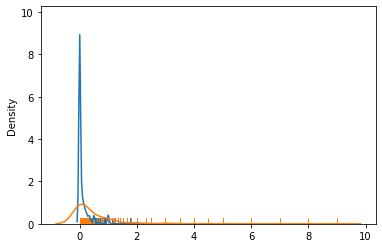

In [20]:
#really left skewed for both, slighthly superior for default=1.. manage with mean
print(target_0[['num_active_div_by_paid_inv_0_12m']].describe())
print(target_1[['num_active_div_by_paid_inv_0_12m']].describe())
sns.distplot(target_0[['num_active_div_by_paid_inv_0_12m']], hist=False, rug=True)
sns.distplot(target_1[['num_active_div_by_paid_inv_0_12m']], hist=False, rug=True)



       num_arch_written_off_0_12m
count                72843.000000
mean                     0.000082
std                      0.009075
min                      0.000000
25%                      0.000000
50%                      0.000000
75%                      0.000000
max                      1.000000
       num_arch_written_off_0_12m
count                  828.000000
mean                     0.002415
std                      0.049118
min                      0.000000
25%                      0.000000
50%                      0.000000
75%                      0.000000
max                      1.000000


/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.

<AxesSubplot:ylabel='Density'>

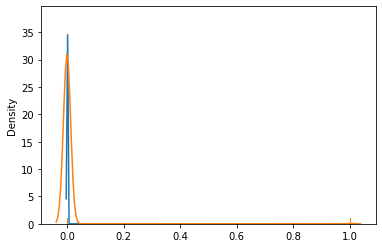

In [21]:
#not informative.. manage with 0 not to loose 15K of data
print(target_0[['num_arch_written_off_0_12m']].describe())
print(target_1[['num_arch_written_off_0_12m']].describe())
sns.distplot(target_0[['num_arch_written_off_0_12m']], hist=False, rug=True)
sns.distplot(target_1[['num_arch_written_off_0_12m']], hist=False, rug=True)
                

       num_arch_written_off_12_24m
count                 72843.000000
mean                      0.000137
std                       0.012834
min                       0.000000
25%                       0.000000
50%                       0.000000
75%                       0.000000
max                       2.000000
       num_arch_written_off_12_24m
count                        828.0
mean                           0.0
std                            0.0
min                            0.0
25%                            0.0
50%                            0.0
75%                            0.0
max                            0.0


/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/andreatamburri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.

<AxesSubplot:ylabel='Density'>

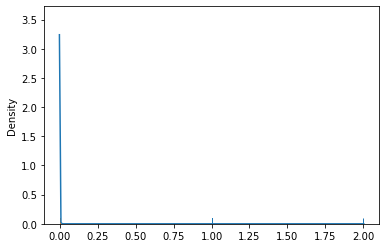

In [22]:
#really not informative, the default has just zeros, but i dont want to wast 15K of data.. manage with 0, risky maybe
print(target_0[['num_arch_written_off_12_24m']].describe())
print(target_1[['num_arch_written_off_12_24m']].describe())
sns.distplot(target_0[['num_arch_written_off_12_24m']], hist=False, rug=True)
sns.distplot(target_1[['num_arch_written_off_12_24m']], hist=False, rug=True)

            